# PRAICP-1011-Cats and dogs classification

## 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import keras

## 2. Load and Prepare Dataset

In [28]:
# Step 1: Create the dataset first
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\ASUS\Documents\Data Mites\AIE\pr\1\PetImages",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\ASUS\Documents\Data Mites\AIE\pr\1\PetImages",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180, 180),
    batch_size=32
)

# Step 2: Get class names before applying ignore_errors
class_names = train_ds_raw.class_names
print("Classes:", class_names)

# Step 3: Now apply ignore_errors
train_ds = train_ds_raw.ignore_errors()
val_ds = val_ds_raw.ignore_errors()


Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Classes: ['Cat', 'Dog']


## 3. Display Sample Images

['Cat', 'Dog']


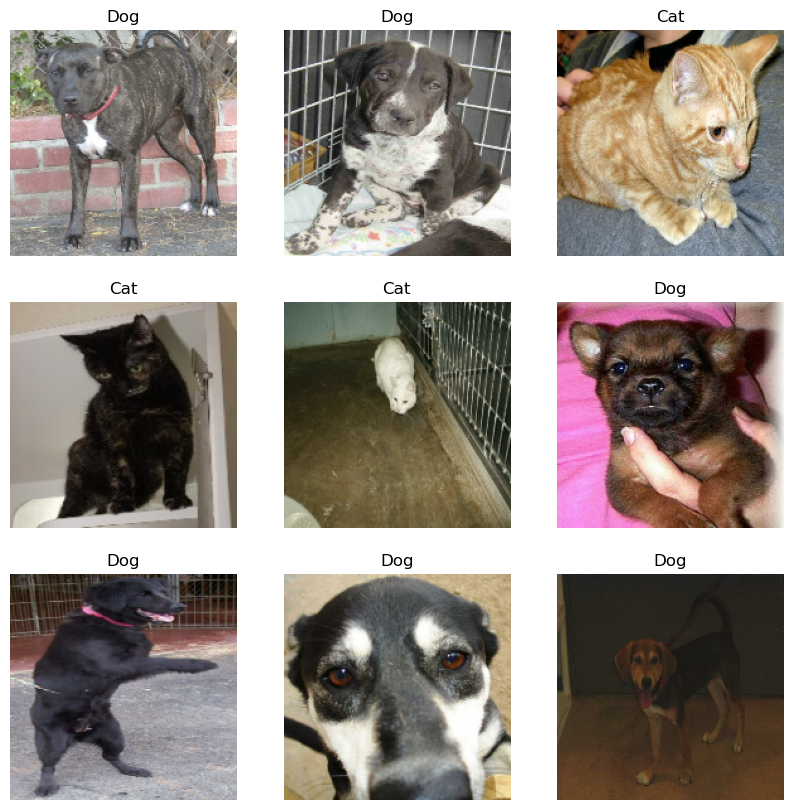

In [77]:
class_names = train_ds_raw.class_names
print(class_names)  

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Using the cleaned dataset (with ignore_errors)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()


## 4. Build the Model

In [79]:
# Create a data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
])


# Build the model
model = tf.keras.Sequential()

# Step 1: Add the augmentation first
model.add(data_augmentation)

# Step 2: Rescaling (only here specify input_shape)
model.add(layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# Step 3: Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


# Step 4: Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  
model.add(layers.Dropout(0.3))                   
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.build((None, 180, 180, 3))   # Tell model input size
model.summary()



Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_10 (Rescaling)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 256)                 │       5,308,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,730,113 (21.86 MB)

 Trainable params: 5,730,113 (21.86 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile the Model

In [80]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [81]:
# Check image loading
for images, labels in train_ds.take(1):
    print(images.shape) 
    print(labels.shape)  

(32, 180, 180, 3)
(32,)


## 6. Train the Model

In [82]:
history2 = model.fit(train_ds, validation_data=val_ds, epochs=35)

Epoch 1/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 547s 859ms/step - accuracy: 0.5339 - loss: 0.6847 - val_accuracy: 0.6527 - val_loss: 0.6123
Epoch 2/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 620s 1s/step - accuracy: 0.6882 - loss: 0.5892 - val_accuracy: 0.7176 - val_loss: 0.5495
Epoch 3/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 581s 938ms/step - accuracy: 0.7266 - loss: 0.5426 - val_accuracy: 0.7484 - val_loss: 0.5069
Epoch 4/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 505s 815ms/step - accuracy: 0.7536 - loss: 0.5061 - val_accuracy: 0.7767 - val_loss: 0.4774
Epoch 5/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 500s 808ms/step - accuracy: 0.7689 - loss: 0.4773 - val_accuracy: 0.7993 - val_loss: 0.4336
Epoch 6/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 512s 827ms/step - accuracy: 0.7882 - loss: 0.4574 - val_accuracy: 0.8132 - val_loss: 0.4100
Epoch 7/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 529s 854ms/step - accuracy: 0.7930 - loss: 0.4434 - val_accuracy: 0.8161 - val_loss: 0.4051
Epoch 8/35
619/619 ━━━━━━━━━━━━━━━━━━━━ 449s 725ms/step - accuracy: 0.8069 - lo

## 7. Plot Accuracy and Loss Curves

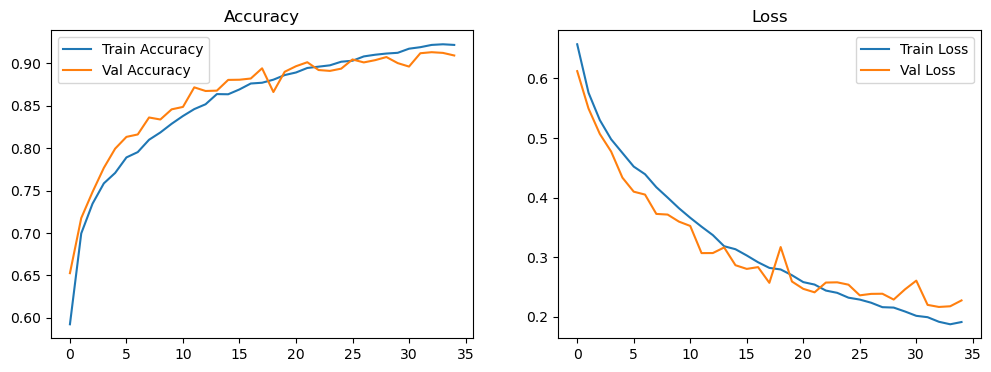

In [83]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy')
plt.plot(val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


## 8. Evaluate the Model

In [85]:
val_loss2, val_accuracy2 = model.evaluate(val_ds)
print(f"Validation Accuracy: {val_accuracy2:.2f}")
print(f"Validation Loss: {val_loss2:.2f}")


154/154 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step - accuracy: 0.9071 - loss: 0.2242
Validation Accuracy: 0.91
Validation Loss: 0.23


## 9. Save the Model

In [91]:
keras.saving.save_model(model, 'cat_dog_classifier_model_91.keras')

## 10. Predict a New Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
It's a Cat! 🐱


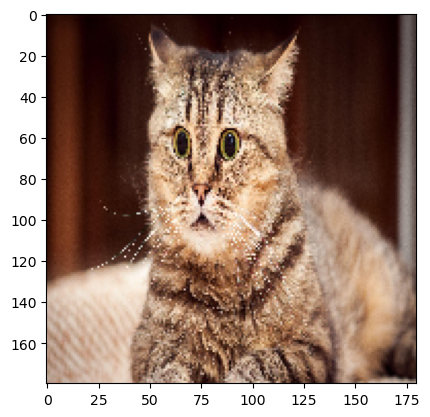

In [86]:

img_path = r"C:\Users\ASUS\Downloads\255883.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Make it a batch of 1

# Predict
predictions = model.predict(img_array)
score = predictions[0]

if score < 0.5:
    print("It's a Cat! 🐱")
else:
    print("It's a Dog! 🐶")

plt.imshow(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
It's a Dog! 🐶


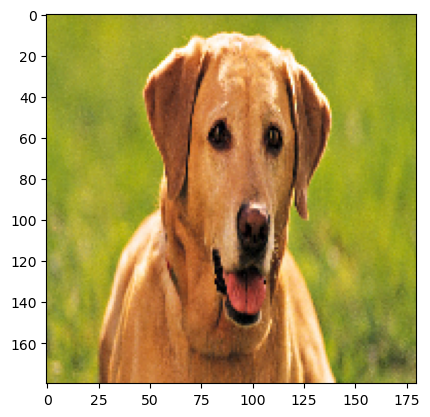

In [92]:

img_path = r"C:\Users\ASUS\Downloads\thumb-1920-275589.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Make it a batch of 1

# Predict
predictions1 = model.predict(img_array)
score = predictions1[0]

if score < 0.5:
    print("It's a Cat! 🐱")
else:
    print("It's a Dog! 🐶")

plt.imshow(img)

# 📝 Project Notes

## 📈 Final Results
- **First Training:**  
  - Validation Accuracy: **80%**
- **Second Training (after improvements):**  
  - Validation Accuracy: **88%**
- **Final Training (optimized model):**  
  - Validation Accuracy: **91%**
  - Final Validation Loss: **~0.23**

✅ We continuously improved the model across stages by adding more layers, data augmentation, and tuning hyperparameters.

---

## ⚡ Challenges Faced
- **Data Issues:**  
  Some images in the dataset were **corrupted or empty**, causing errors during loading.  
  ➔ **Solution:** Used `.ignore_errors()` when loading datasets to skip bad files.

- **Training Time:**  
  The model took **longer time to train** due to a deeper CNN structure.  

- **Overfitting Risk:**  
  Deeper models tended to **overfit**.  
  ➔ **Solution:**  
  - Applied **Data Augmentation** (random flip, zoom, rotation, contrast).
  - Added a **Dropout Layer (30%)** after Dense layers.

---

## 🏆 Model Strengths
- **High Accuracy:** Achieved **91% validation accuracy** in the final model.
- **Good Generalization:** Model was able to **correctly predict unseen test images**.
- **Modern Saving Format:** Model saved in `.keras` format instead of old `.h5`.
- **Data Handling:** Managed corrupted files automatically using TensorFlow pipelines.

---


# 🎯 Conclusion
This project successfully built a **Cat vs Dog Image Classifier** using **TensorFlow/Keras**.  
Through multiple improvements and solving real-world data issues, the model achieved a strong **91% validation accuracy**.  
The project demonstrates the importance of **augmentation**, **regularization**, and **model tuning** when working with real datasets.

---

> 💬 *"Progressive improvement by analyzing results after each training phase helped achieve a high-performing and reliable model."*

---
